In [1]:
import bamboolib as bib
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from dython.nominal import associations
from sklearn.metrics import classification_report
from sklearn import svm
from datetime import datetime as dt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier






bib.enable()

Success: the bamboolib extension was enabled successfully. You can disable it via 'bam.disable()'. You will now see a magic bamboolib button when you display your dataframes, for example via 'df'


In [2]:
#Reading data
houseData = pd.read_csv(r'C:\Users\jalaj\Documents\ALY6020\Datasets\week 4 - Nashville_housing_data.csv')
houseData

       Unnamed: 0        Parcel ID       Land Use       Property Address  \
0               1  105 11 0 080.00  SINGLE FAMILY       1802  STEWART PL   
1               2  118 03 0 130.00  SINGLE FAMILY      2761  ROSEDALE PL   
2               3  119 01 0 479.00  SINGLE FAMILY      224  PEACHTREE ST   
3               4  119 05 0 186.00  SINGLE FAMILY          316  LUTIE ST   
4               5  119 05 0 387.00  SINGLE FAMILY       2626  FOSTER AVE   
...           ...              ...            ...                    ...   
22646       56602  176 01 0 003.00  SINGLE FAMILY     4617 ROCKLAND  TRL   
22647       56605  176 05 0 070.00  SINGLE FAMILY      5004 SUNSHINE  DR   
22648       56607  176 09 0 003.00  SINGLE FAMILY  4964 HICKORY WOODS  E   
22649       56614  082 05 0 040.00  SINGLE FAMILY        1625 5TH  AVE N   
22650       56615  082 05 0 058.00  SINGLE FAMILY        1614 5TH  AVE N   

       Suite/ Condo   # Property City   Sale Date   Legal Reference  \
0               

In [3]:
# convert the 'Date' column to datetime format
houseData['Sale Date']= pd.to_datetime(houseData['Sale Date'])

# creating Year, Month, Day columns
houseData['SaleYear'] = houseData["Sale Date"].dt.year
houseData['SaleMonth'] = houseData["Sale Date"].dt.month
houseData['SaleDay'] = houseData["Sale Date"].dt.day


In [4]:
# Step: Drop columns
houseDataClean = houseData.drop(columns=['Suite/ Condo   #', 'Unnamed: 0', 'Parcel ID', 'Legal Reference', 'State', 'Sale Date', 'City', 'Property Address'])

houseDataClean

            Land Use Property City Sold As Vacant  \
0      SINGLE FAMILY     NASHVILLE             No   
1      SINGLE FAMILY     NASHVILLE             No   
2      SINGLE FAMILY     NASHVILLE             No   
3      SINGLE FAMILY     NASHVILLE             No   
4      SINGLE FAMILY     NASHVILLE             No   
...              ...           ...            ...   
22646  SINGLE FAMILY       ANTIOCH             No   
22647  SINGLE FAMILY       ANTIOCH             No   
22648  SINGLE FAMILY       ANTIOCH             No   
22649  SINGLE FAMILY     NASHVILLE             No   
22650  SINGLE FAMILY     NASHVILLE             No   

      Multiple Parcels Involved in Sale  Acreage             Tax District  \
0                                    No     0.17  URBAN SERVICES DISTRICT   
1                                    No     0.11       CITY OF BERRY HILL   
2                                    No     0.17  URBAN SERVICES DISTRICT   
3                                    No     0.34  URBAN

In [5]:
# Step: Drop rows where ((((((Property Address is missing) or (Property City is missing)) or (Finished Area is missing)) or (Foundation Type is missing)) or (Bedrooms is missing)) or (Full Bath is missing)) or (Half Bath is missing)
houseDataClean1 = houseDataClean.loc[~(((((((houseDataClean['Property City'].isna())) | (houseDataClean['Finished Area'].isna())) | (houseDataClean['Foundation Type'].isna())) | (houseDataClean['Bedrooms'].isna())) | (houseDataClean['Full Bath'].isna())) | (houseDataClean['Half Bath'].isna()))]

houseDataClean1

            Land Use Property City Sold As Vacant  \
0      SINGLE FAMILY     NASHVILLE             No   
1      SINGLE FAMILY     NASHVILLE             No   
2      SINGLE FAMILY     NASHVILLE             No   
3      SINGLE FAMILY     NASHVILLE             No   
4      SINGLE FAMILY     NASHVILLE             No   
...              ...           ...            ...   
22646  SINGLE FAMILY       ANTIOCH             No   
22647  SINGLE FAMILY       ANTIOCH             No   
22648  SINGLE FAMILY       ANTIOCH             No   
22649  SINGLE FAMILY     NASHVILLE             No   
22650  SINGLE FAMILY     NASHVILLE             No   

      Multiple Parcels Involved in Sale  Acreage             Tax District  \
0                                    No     0.17  URBAN SERVICES DISTRICT   
1                                    No     0.11       CITY OF BERRY HILL   
2                                    No     0.17  URBAN SERVICES DISTRICT   
3                                    No     0.34  URBAN

In [6]:
duplicates = houseDataClean1[houseDataClean1.duplicated()]
duplicates

            Land Use Property City Sold As Vacant  \
265    SINGLE FAMILY     NASHVILLE             No   
945           DUPLEX     NASHVILLE             No   
1076   SINGLE FAMILY     NASHVILLE            Yes   
1242   SINGLE FAMILY     NASHVILLE             No   
1969   SINGLE FAMILY     NASHVILLE             No   
...              ...           ...            ...   
21714  SINGLE FAMILY     NASHVILLE             No   
21722  SINGLE FAMILY     NASHVILLE             No   
22351  SINGLE FAMILY     NASHVILLE             No   
22426  SINGLE FAMILY       MADISON             No   
22429  SINGLE FAMILY       MADISON             No   

      Multiple Parcels Involved in Sale  Acreage               Tax District  \
265                                  No     0.07    URBAN SERVICES DISTRICT   
945                                 Yes     0.14    URBAN SERVICES DISTRICT   
1076                                 No     0.08    URBAN SERVICES DISTRICT   
1242                                 No     0.1

In [7]:
# Step: Drop duplicates based on ['Land Use', 'Property Address', 'Property City', 'Sale Date', 'Sold As Vacant', 'Multiple Parcels Involved in Sale', 'City', 'Acreage', 'Tax District', 'Neighborhood', 'Land Value', 'Building Value', 'Finished Area', 'Foundation Type', 'Year Built', 'Exterior Wall', 'Grade', 'Bedrooms', 'Full Bath', 'Half Bath', 'Sale Price Compared To Value']
# Find duplicates


houseDataClean2 = houseDataClean1.drop_duplicates(keep='first')
houseDataClean2

            Land Use Property City Sold As Vacant  \
0      SINGLE FAMILY     NASHVILLE             No   
1      SINGLE FAMILY     NASHVILLE             No   
2      SINGLE FAMILY     NASHVILLE             No   
3      SINGLE FAMILY     NASHVILLE             No   
4      SINGLE FAMILY     NASHVILLE             No   
...              ...           ...            ...   
22646  SINGLE FAMILY       ANTIOCH             No   
22647  SINGLE FAMILY       ANTIOCH             No   
22648  SINGLE FAMILY       ANTIOCH             No   
22649  SINGLE FAMILY     NASHVILLE             No   
22650  SINGLE FAMILY     NASHVILLE             No   

      Multiple Parcels Involved in Sale  Acreage             Tax District  \
0                                    No     0.17  URBAN SERVICES DISTRICT   
1                                    No     0.11       CITY OF BERRY HILL   
2                                    No     0.17  URBAN SERVICES DISTRICT   
3                                    No     0.34  URBAN

In [8]:
descStat = houseDataClean2.describe([0.25,0.5,0.75,0.8,0.85,0.9,0.95,0.99,1])
descStat = descStat.reset_index()
descStat

    index       Acreage  Neighborhood    Land Value  Building Value  \
0   count  22394.000000  22394.000000  2.239400e+04    2.239400e+04   
1    mean      0.456574   4442.019514  7.044282e+04    1.724655e+05   
2     std      0.614367   2141.359212  1.032599e+05    1.901994e+05   
3     min      0.040000    107.000000  9.000000e+02    1.400000e+03   
4     25%      0.200000   3130.000000  2.200000e+04    8.560000e+04   
5     50%      0.280000   4026.000000  3.000000e+04    1.189000e+05   
6     75%      0.460000   6229.000000  6.300000e+04    1.881750e+05   
7     80%      0.550000   6732.000000  9.000000e+04    2.148000e+05   
8     85%      0.750000   6927.000000  1.500000e+05    2.530000e+05   
9     90%      0.970000   7328.000000  1.950000e+05    3.088700e+05   
10    95%      1.210000   9026.000000  2.500000e+05    4.567000e+05   
11    99%      2.850700   9528.000000  4.695000e+05    9.959000e+05   
12   100%     17.500000   9530.000000  1.869000e+06    5.824300e+06   
13    

In [9]:
numHouseData = houseDataClean2.select_dtypes(include=['int', 'float'])
numHouseData

       Acreage  Neighborhood  Land Value  Building Value  Finished Area  \
0         0.17          3127       32000          134400     1149.00000   
1         0.11          9126       34000          157800     2090.82495   
2         0.17          3130       25000          243700     2145.60001   
3         0.34          3130       25000          138100     1969.00000   
4         0.17          3130       25000           86100     1037.00000   
...        ...           ...         ...             ...            ...   
22646     0.38          6328       25000          105000     1758.00000   
22647     0.27          6328       25000          142400     2421.00000   
22648     0.23          6328       25000          159300     3117.00000   
22649     0.15           126       40000          204100     1637.00000   
22650     0.19           126       40000          295900     2478.00000   

       Year Built  Bedrooms  Full Bath  Half Bath  SaleYear  SaleMonth  \
0            1941       2

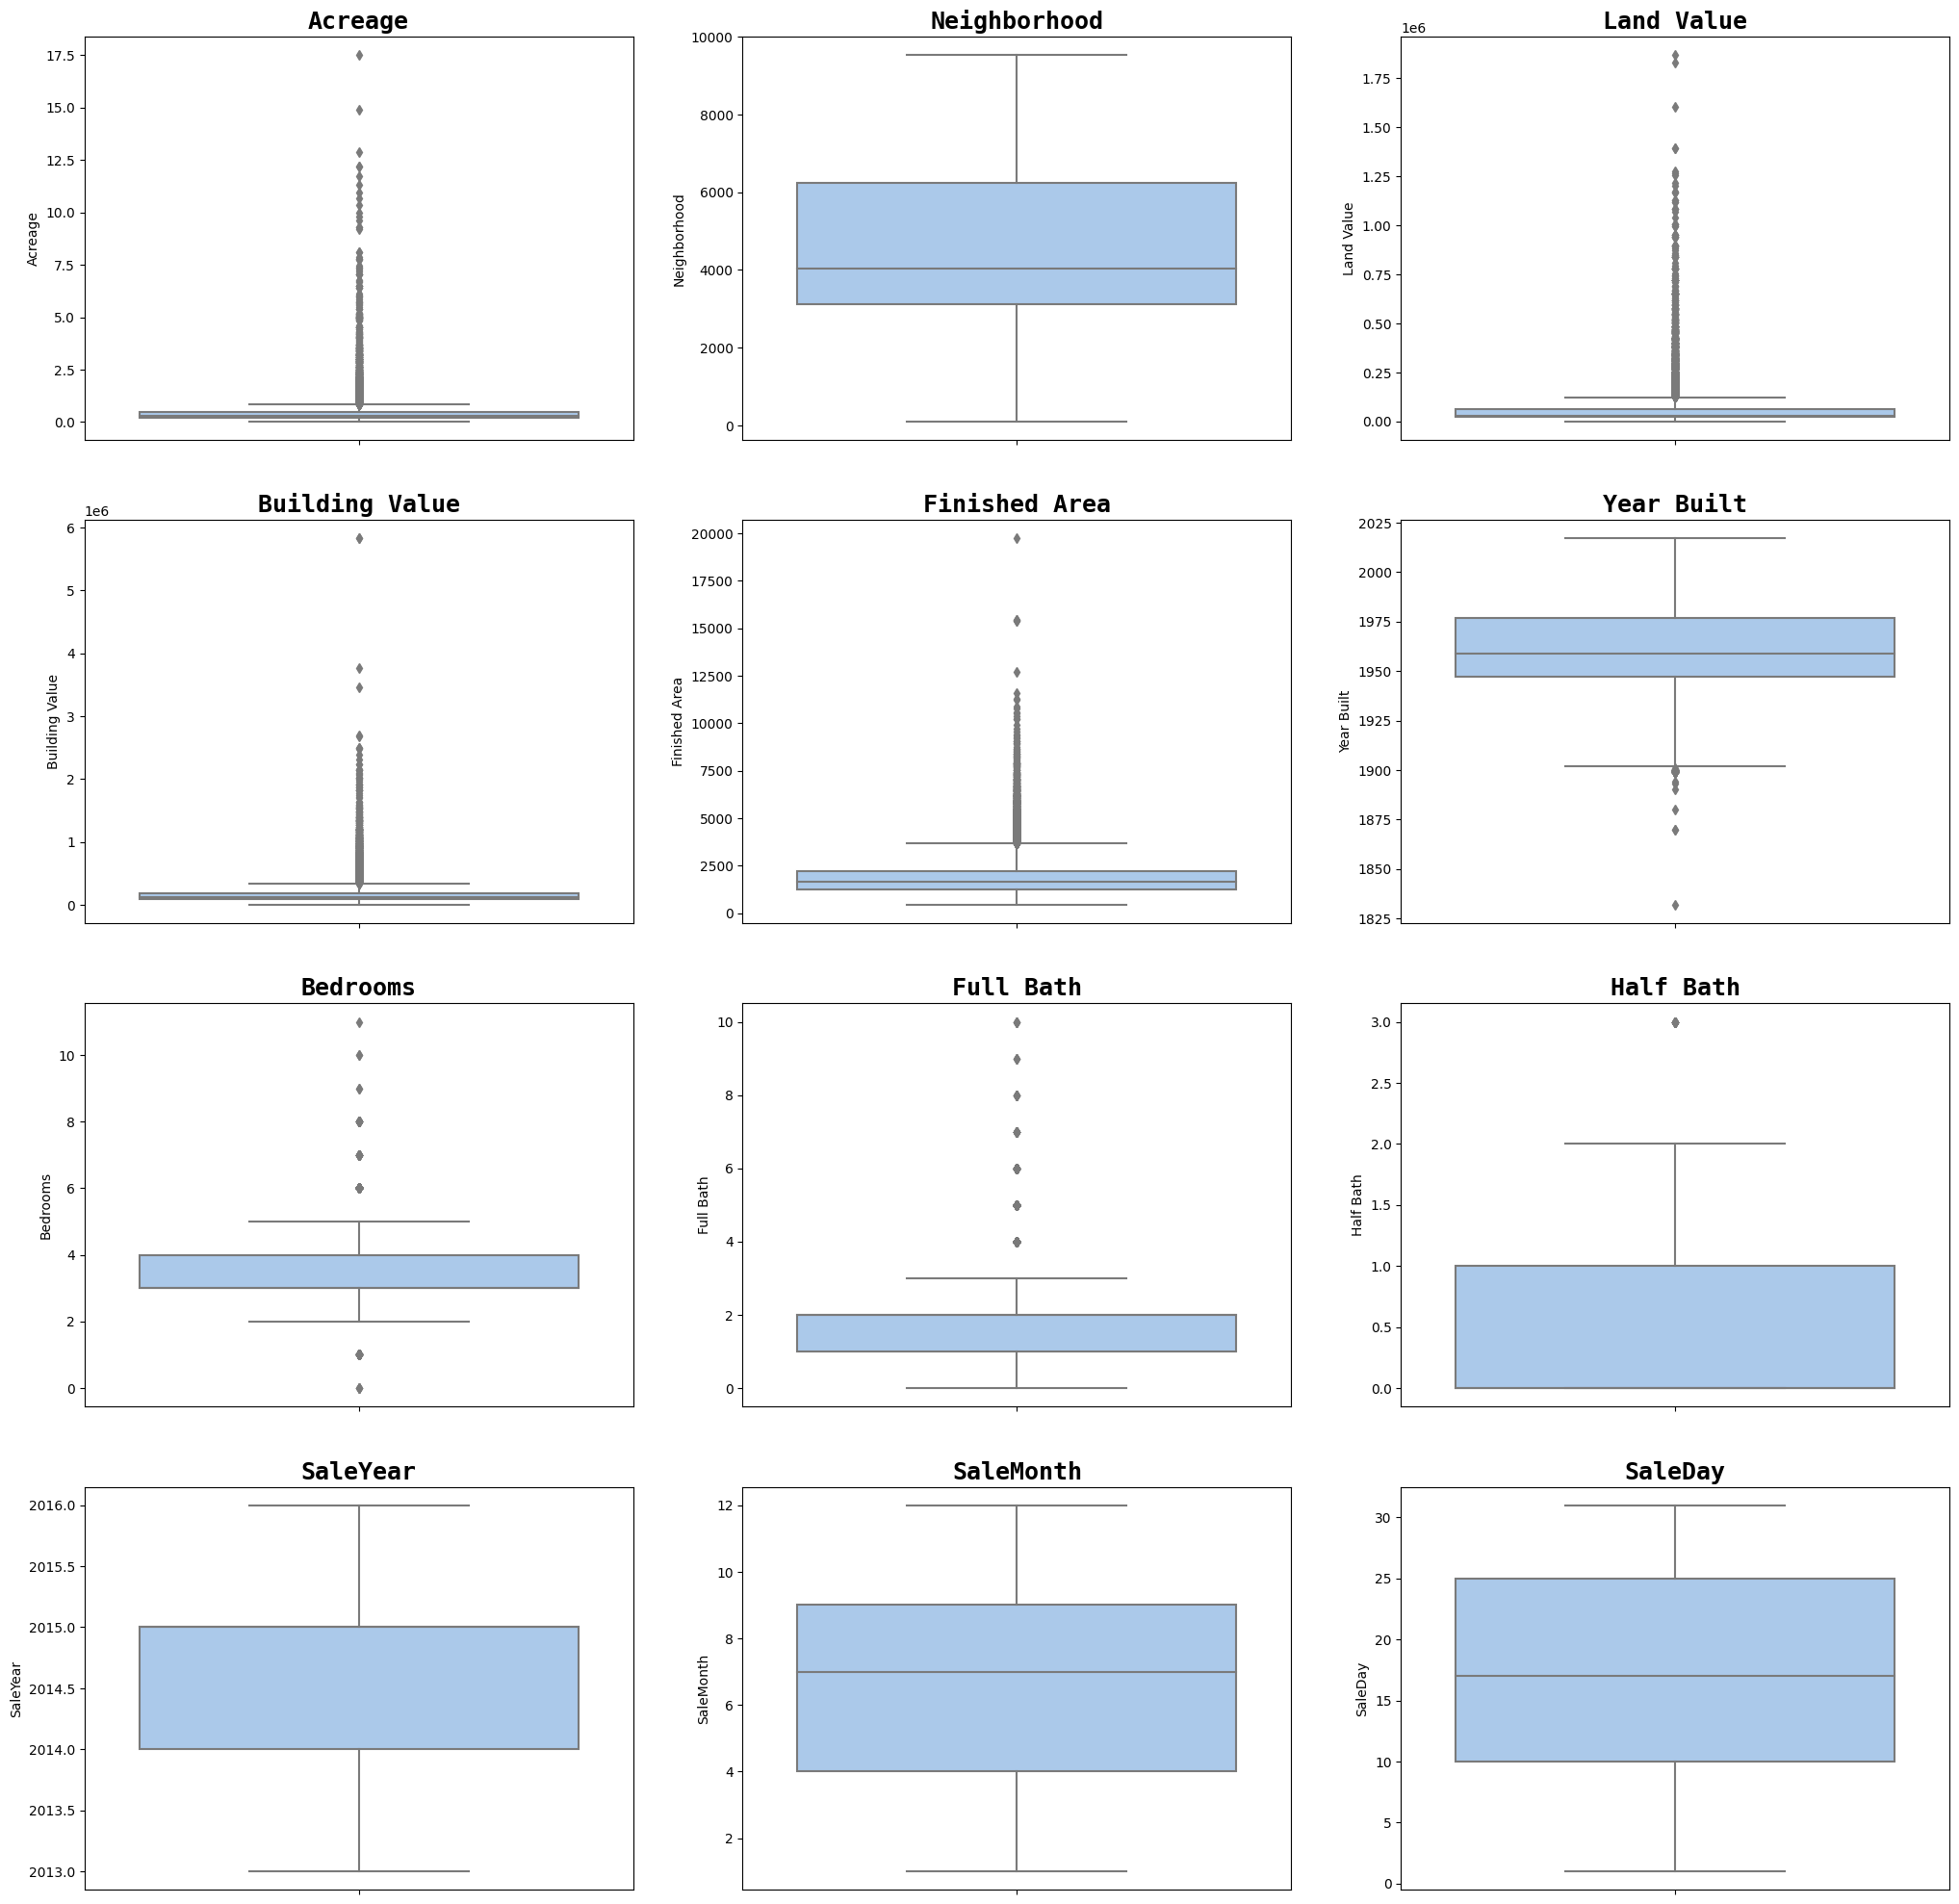

In [10]:
fig, ax = plt.subplots(4, 3, figsize = (25, 25))

for i, col in enumerate(numHouseData.columns):
    g = sns.boxplot(data = numHouseData, y = col, ax = ax[i // 3, i % 3], palette = "pastel")
    g.set_title(col, weight = "bold", fontsize = 18, fontname = "monospace")

In [11]:
# Step: Drop rows where ((((Acreage > 8.5) or (Land Value > 150000)) or (Building Value > 300000)) or (Finished Area > 3000)) or (Year Built < 1900)
#houseDataClean3 = houseDataClean2.loc[~(((((houseDataClean2['Acreage'] > 8.5) | (houseDataClean2['Land Value'] > 150000)) | (houseDataClean2['Building Value'] > 300000)) | (houseDataClean2['Finished Area'] > 3000)) | (houseDataClean2['Year Built'] < 1900))]
#houseDataClean3

In [12]:
# Step: Drop rows where Year Built < 1900
houseDataClean3 = houseDataClean2.loc[~(houseDataClean2['Year Built'] < 1900)]

houseDataClean3



            Land Use Property City Sold As Vacant  \
0      SINGLE FAMILY     NASHVILLE             No   
1      SINGLE FAMILY     NASHVILLE             No   
2      SINGLE FAMILY     NASHVILLE             No   
3      SINGLE FAMILY     NASHVILLE             No   
4      SINGLE FAMILY     NASHVILLE             No   
...              ...           ...            ...   
22646  SINGLE FAMILY       ANTIOCH             No   
22647  SINGLE FAMILY       ANTIOCH             No   
22648  SINGLE FAMILY       ANTIOCH             No   
22649  SINGLE FAMILY     NASHVILLE             No   
22650  SINGLE FAMILY     NASHVILLE             No   

      Multiple Parcels Involved in Sale  Acreage             Tax District  \
0                                    No     0.17  URBAN SERVICES DISTRICT   
1                                    No     0.11       CITY OF BERRY HILL   
2                                    No     0.17  URBAN SERVICES DISTRICT   
3                                    No     0.34  URBAN

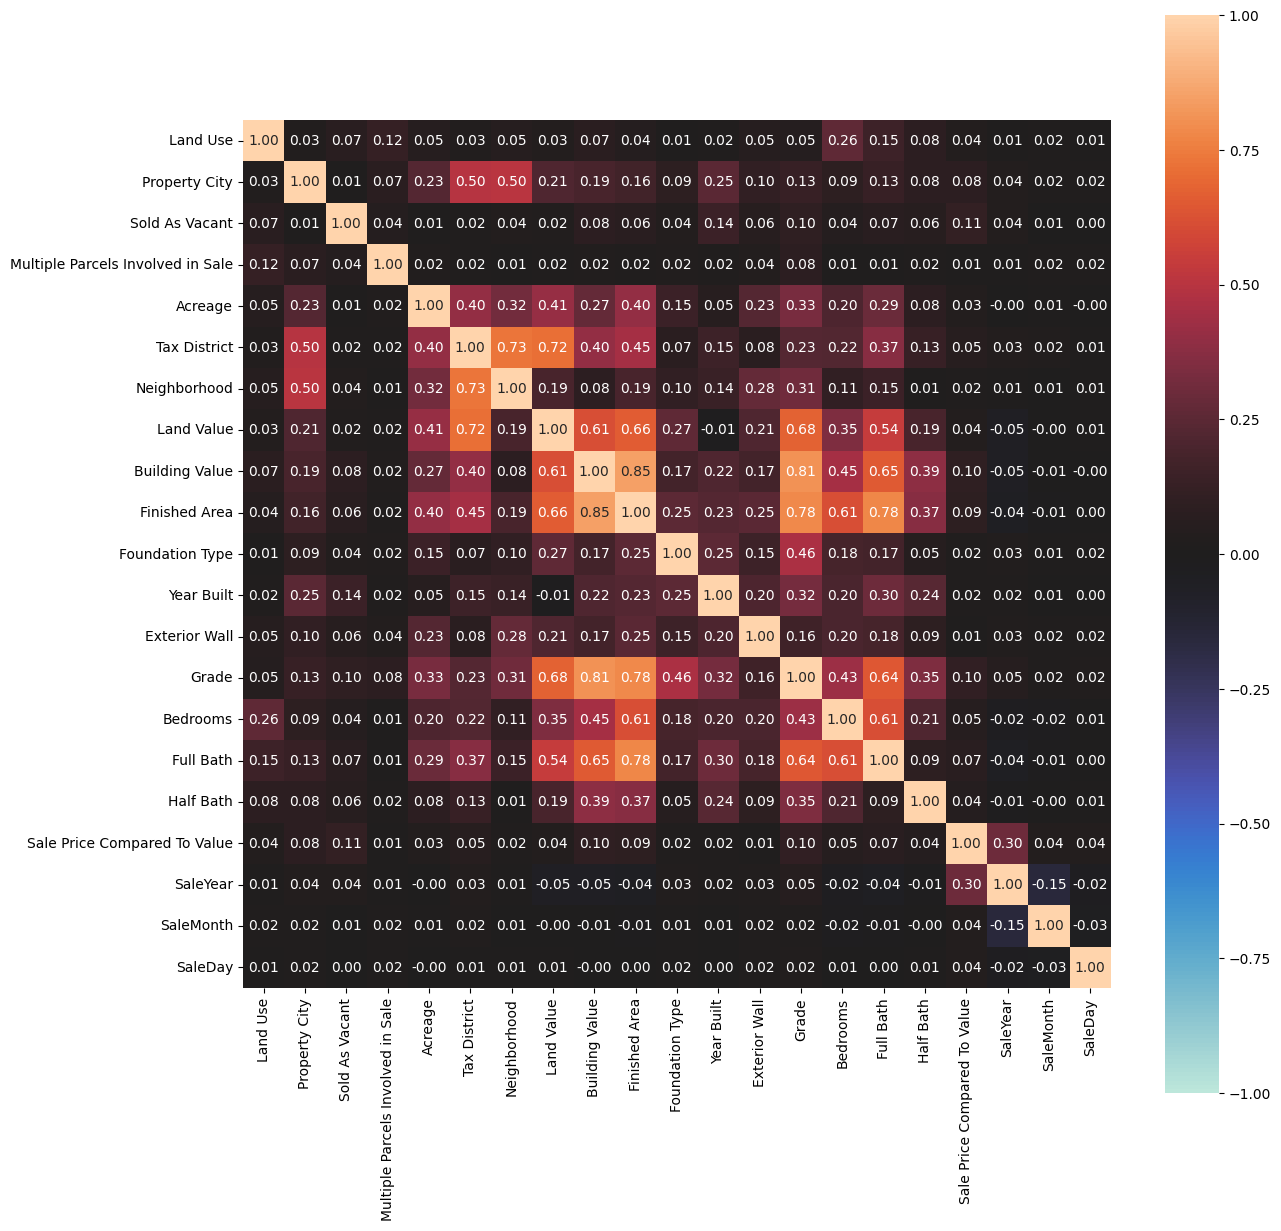

In [13]:
complete_correlation= associations(houseDataClean3, filename= 'complete_correlation.png', figsize=(14,14))

[Text(0, 0, 'SINGLE FAMILY'),
 Text(1, 0, 'DUPLEX'),
 Text(2, 0, 'RESIDENTIAL COMBO/MISC'),
 Text(3, 0, 'QUADPLEX')]

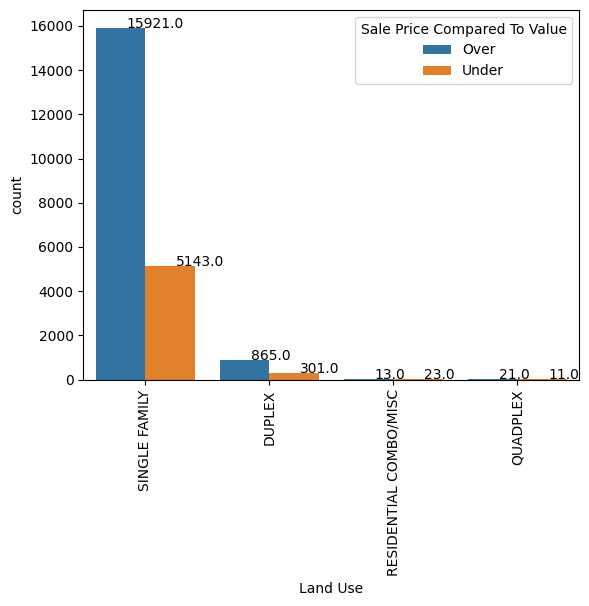

In [14]:
ax = sns.countplot(x=houseDataClean3['Land Use'], hue = houseDataClean3['Sale Price Compared To Value'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    # rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

[Text(0, 0, 'PT BSMT'),
 Text(1, 0, 'SLAB'),
 Text(2, 0, 'FULL BSMT'),
 Text(3, 0, 'CRAWL'),
 Text(4, 0, 'PIERS'),
 Text(5, 0, 'TYPICAL')]

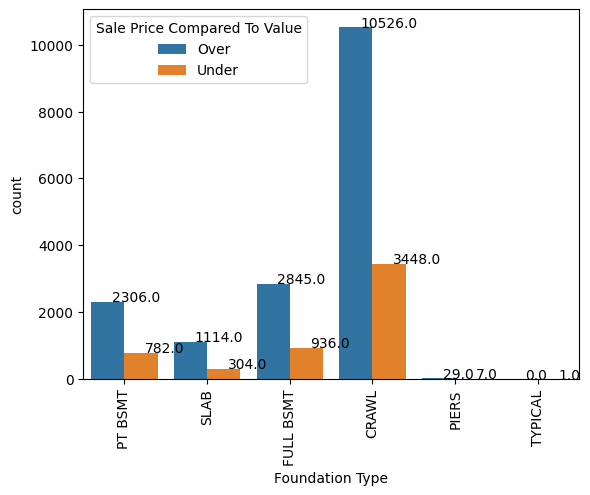

In [15]:
ax = sns.countplot(x=houseDataClean3['Foundation Type'], hue = houseDataClean3['Sale Price Compared To Value'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    # rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

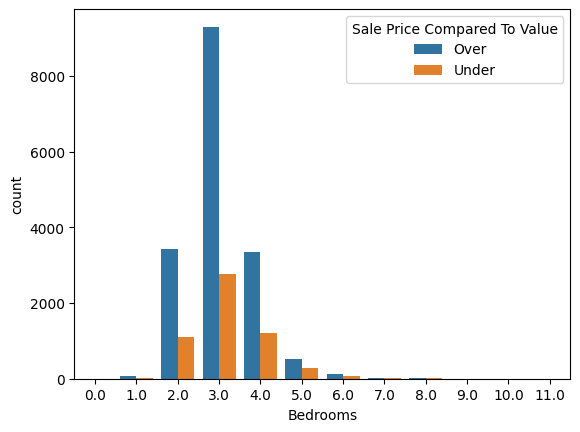

In [16]:
ax = sns.countplot(x=houseDataClean3['Bedrooms'], hue = houseDataClean3['Sale Price Compared To Value'])
#for p in ax.patches:
   #ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
    # rotate x-axis labels
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

### Logistic Regression

In [17]:
lrData = houseDataClean3.copy()


In [18]:
import pandas as pd; import numpy as np
# Step: LabelEncoder
lrData['Land Use'] = lrData['Land Use'].factorize(sort=False, na_sentinel=-1)[0]
lrData['Property City'] = lrData['Property City'].factorize(sort=False, na_sentinel=-1)[0]
lrData['Sold As Vacant'] = lrData['Sold As Vacant'].factorize(sort=False, na_sentinel=-1)[0]
lrData['Multiple Parcels Involved in Sale'] = lrData['Multiple Parcels Involved in Sale'].factorize(sort=False, na_sentinel=-1)[0]
lrData['Tax District'] = lrData['Tax District'].factorize(sort=False, na_sentinel=-1)[0]
lrData['Foundation Type'] = lrData['Foundation Type'].factorize(sort=False, na_sentinel=-1)[0]
lrData['Exterior Wall'] = lrData['Exterior Wall'].factorize(sort=False, na_sentinel=-1)[0]
lrData['Grade'] = lrData['Grade'].factorize(sort=False, na_sentinel=-1)[0]
lrData['Sale Price Compared To Value'] = lrData['Sale Price Compared To Value'].factorize(sort=False, na_sentinel=-1)[0]

lrData

       Land Use  Property City  Sold As Vacant  \
0             0              0               0   
1             0              0               0   
2             0              0               0   
3             0              0               0   
4             0              0               0   
...         ...            ...             ...   
22646         0              1               0   
22647         0              1               0   
22648         0              1               0   
22649         0              0               0   
22650         0              0               0   

       Multiple Parcels Involved in Sale  Acreage  Tax District  Neighborhood  \
0                                      0     0.17             0          3127   
1                                      0     0.11             1          9126   
2                                      0     0.17             0          3130   
3                                      0     0.34             0          31

In [19]:

y_logr=lrData[['Sale Price Compared To Value']]
x_logr=lrData.drop(['Sale Price Compared To Value'],axis=1)
  

x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20, random_state=42)

In [20]:
Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())


Optimization terminated successfully.
         Current function value: 0.491994
         Iterations 8
                                Logit Regression Results                                
Dep. Variable:     Sale Price Compared To Value   No. Observations:                17838
Model:                                    Logit   Df Residuals:                    17817
Method:                                     MLE   Df Model:                           20
Date:                          Fri, 31 Mar 2023   Pseudo R-squ.:                  0.1165
Time:                                  19:38:36   Log-Likelihood:                -8776.2
converged:                                 True   LL-Null:                       -9933.7
Covariance Type:                      nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------

In [21]:
logreg = LogisticRegression()

logreg.fit(x_train,z_train)


z_pred=logreg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(z_test, z_pred)
print(classification_report(z_test, z_pred))
print("Accuracy:",metrics.accuracy_score(z_test, z_pred))
print("Precision:",metrics.precision_score(z_test, z_pred))
print("Recall:",metrics.recall_score(z_test, z_pred))
logreg.score(x_test, z_test)



              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3354
           1       0.77      0.02      0.04      1106

    accuracy                           0.76      4460
   macro avg       0.76      0.51      0.45      4460
weighted avg       0.76      0.76      0.66      4460

Accuracy: 0.7558295964125561
Precision: 0.7741935483870968
Recall: 0.0216998191681736


0.7558295964125561

In [22]:
cnf_matrix

array([[3347,    7],
       [1082,   24]], dtype=int64)

<Axes: >

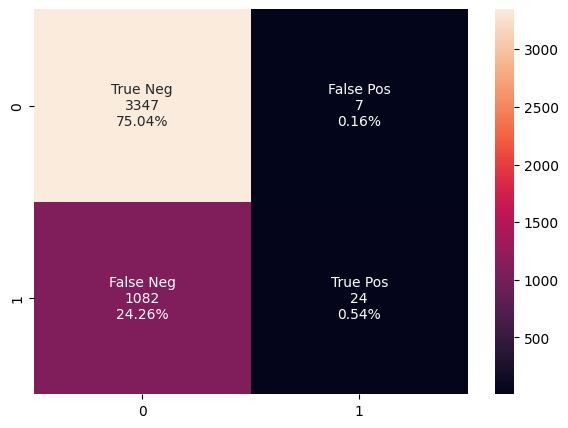

In [23]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='')

### Decision Tree Classifier

In [24]:
houseDataClean3

            Land Use Property City Sold As Vacant  \
0      SINGLE FAMILY     NASHVILLE             No   
1      SINGLE FAMILY     NASHVILLE             No   
2      SINGLE FAMILY     NASHVILLE             No   
3      SINGLE FAMILY     NASHVILLE             No   
4      SINGLE FAMILY     NASHVILLE             No   
...              ...           ...            ...   
22646  SINGLE FAMILY       ANTIOCH             No   
22647  SINGLE FAMILY       ANTIOCH             No   
22648  SINGLE FAMILY       ANTIOCH             No   
22649  SINGLE FAMILY     NASHVILLE             No   
22650  SINGLE FAMILY     NASHVILLE             No   

      Multiple Parcels Involved in Sale  Acreage             Tax District  \
0                                    No     0.17  URBAN SERVICES DISTRICT   
1                                    No     0.11       CITY OF BERRY HILL   
2                                    No     0.17  URBAN SERVICES DISTRICT   
3                                    No     0.34  URBAN

In [25]:
houseDataClean3

y=houseDataClean3[['Sale Price Compared To Value']]
x=houseDataClean3.drop(['Sale Price Compared To Value'],axis=1)

x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20, random_state=42)

In [26]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=4, max_features=5)   
dt_model.fit(x_train,z_train)

DecisionTreeClassifier(max_depth=4, max_features=5, random_state=42)

In [27]:
z_predict = dt_model.predict(x_test)
accuracy_score(z_test,z_predict)

0.7569506726457399

In [28]:
cnf_matrix_dt = metrics.confusion_matrix(z_test, z_predict)
print(classification_report(z_test, z_predict))
print("Accuracy:",metrics.accuracy_score(z_test, z_predict))
print("Precision:",metrics.precision_score(z_test, z_predict))
print("Recall:",metrics.recall_score(z_test, z_predict))


              precision    recall  f1-score   support

           0       0.76      0.98      0.86      3354
           1       0.58      0.07      0.12      1106

    accuracy                           0.76      4460
   macro avg       0.67      0.53      0.49      4460
weighted avg       0.72      0.76      0.68      4460

Accuracy: 0.7569506726457399
Precision: 0.5833333333333334
Recall: 0.06962025316455696


In [29]:
cnf_matrix_dt

array([[3299,   55],
       [1029,   77]], dtype=int64)

<Axes: >

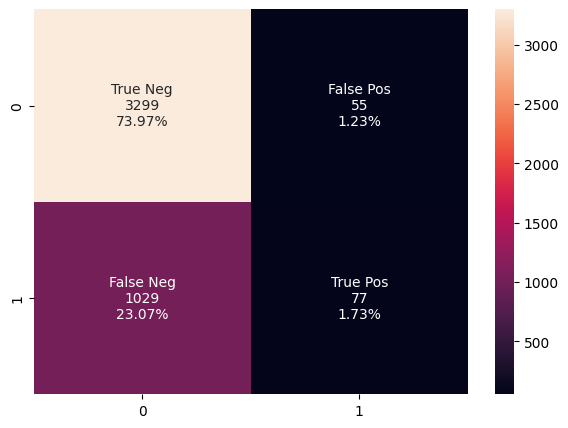

In [30]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_dt.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_dt.flatten()/np.sum(cnf_matrix_dt)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_dt, annot=labels, fmt='')

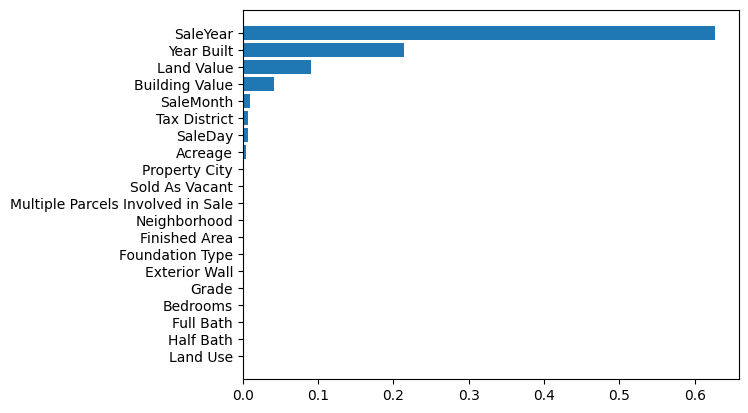

In [31]:
#Feature Importance
importances = dt_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

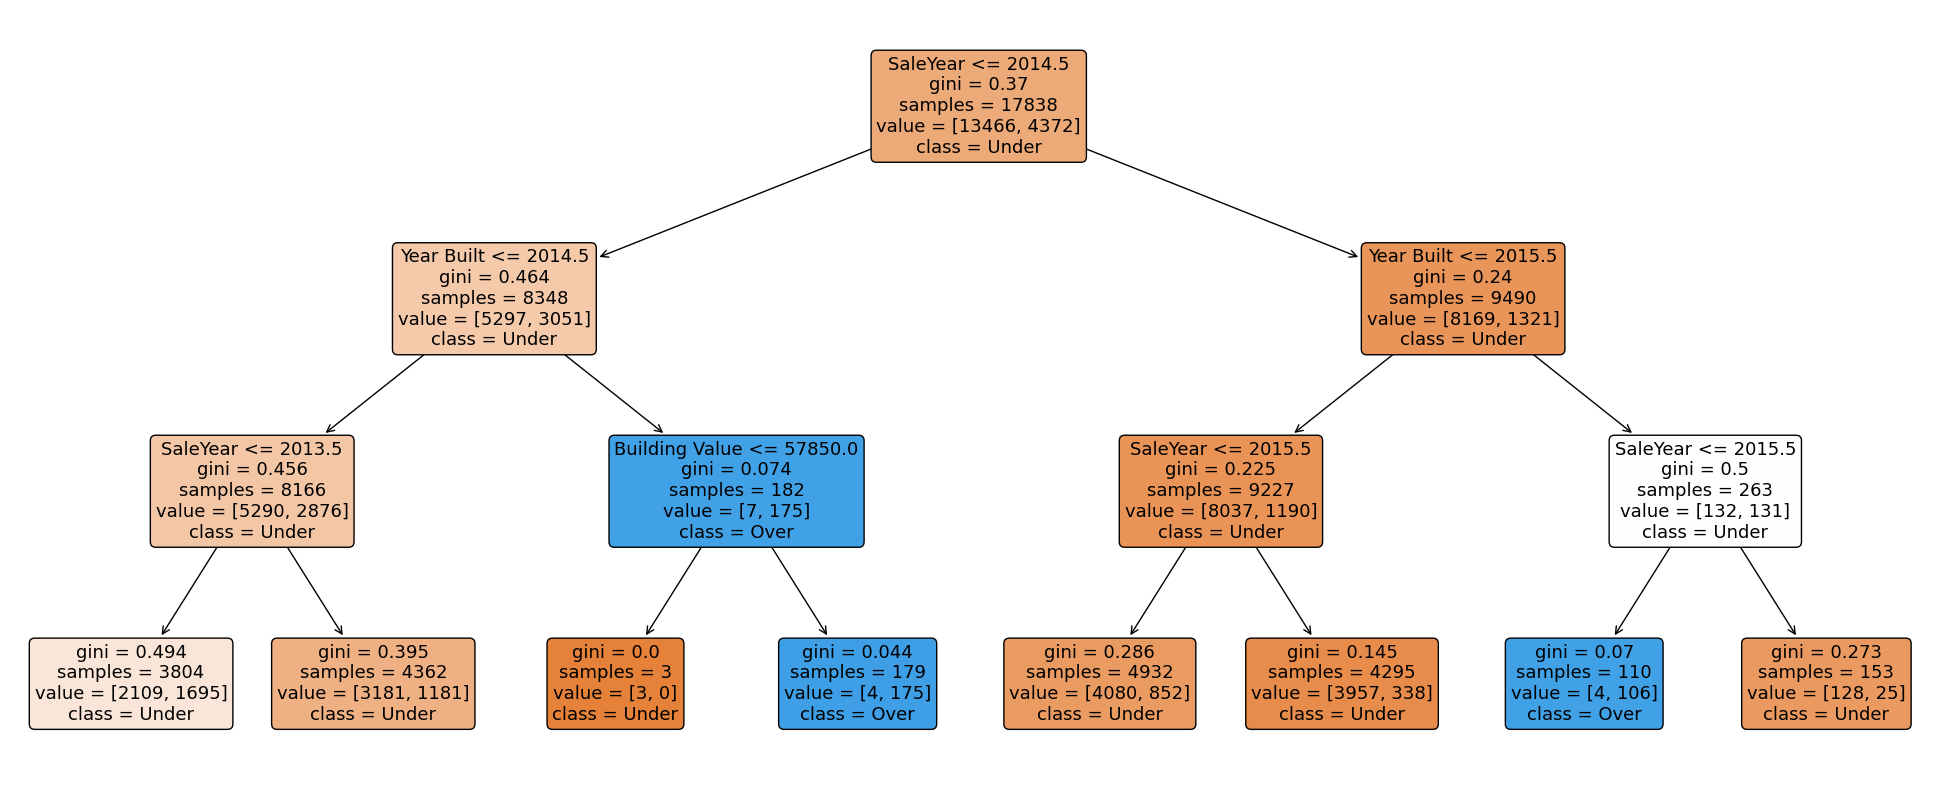

In [32]:
#Creating the decision tree

from sklearn import tree

treemodel = DecisionTreeClassifier(max_depth=3)
treemodel.fit(x_train,z_train)
plt.figure(figsize=(25,10))
plot=tree.plot_tree(treemodel,feature_names=x.columns.values.tolist(),class_names=['Under','Over'],filled=True,rounded=True,fontsize=13)

### Random Forest Classifier

In [33]:
rf_model = RandomForestClassifier(random_state=42,max_depth=4)   
rf_model.fit(x_train,z_train)

RandomForestClassifier(max_depth=4, random_state=42)

In [34]:
zrf_predict = rf_model.predict(x_test)


In [35]:
cnf_matrix_rf = metrics.confusion_matrix(z_test, zrf_predict)
print(classification_report(z_test, zrf_predict))
print("Accuracy:",metrics.accuracy_score(z_test, zrf_predict))
print("Precision:",metrics.precision_score(z_test, zrf_predict))
print("Recall:",metrics.recall_score(z_test, zrf_predict))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      3354
           1       0.94      0.03      0.06      1106

    accuracy                           0.76      4460
   macro avg       0.85      0.51      0.46      4460
weighted avg       0.80      0.76      0.66      4460

Accuracy: 0.7589686098654709
Precision: 0.9428571428571428
Recall: 0.029837251356238697


In [36]:
cnf_matrix_rf

array([[3352,    2],
       [1073,   33]], dtype=int64)

<Axes: >

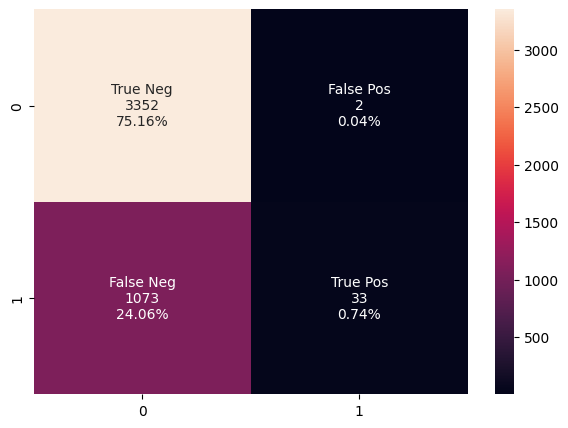

In [37]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_rf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_rf.flatten()/np.sum(cnf_matrix_rf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_rf, annot=labels, fmt='')

['Multiple Parcels Involved in Sale' 'Half Bath' 'Foundation Type'
 'Tax District' 'Exterior Wall' 'Land Use' 'Property City' 'Bedrooms'
 'SaleDay' 'Acreage' 'Neighborhood' 'Full Bath' 'Grade' 'SaleMonth'
 'Finished Area' 'Building Value' 'Land Value' 'Sold As Vacant'
 'Year Built' 'SaleYear'] range(0, 20) [0.00120103 0.00216631 0.00223339 0.00252334 0.00337956 0.00557753
 0.00600201 0.0076046  0.01232408 0.01520625 0.01966183 0.02279626
 0.02722644 0.03436719 0.03825639 0.0797084  0.08119521 0.08696282
 0.10187492 0.44973243]


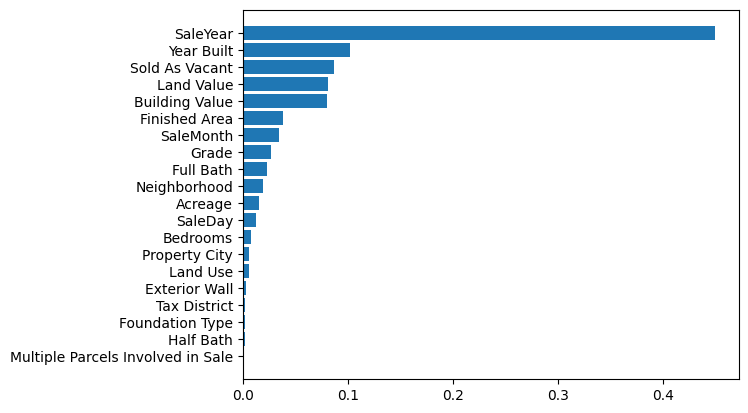

In [53]:
#Feature Importance
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

### XGBoost

In [39]:
gb_model = GradientBoostingClassifier(random_state=42,max_depth=4)   
gb_model.fit(x_train,z_train)

GradientBoostingClassifier(max_depth=4, random_state=42)

In [40]:
zgb_predict = gb_model.predict(x_test)

In [41]:
cnf_matrix_gb = metrics.confusion_matrix(z_test, zgb_predict)
print(classification_report(z_test, zgb_predict))
print("Accuracy:",metrics.accuracy_score(z_test, zgb_predict))
print("Precision:",metrics.precision_score(z_test, zgb_predict))
print("Recall:",metrics.recall_score(z_test, zgb_predict))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      3354
           1       0.68      0.23      0.34      1106

    accuracy                           0.78      4460
   macro avg       0.73      0.59      0.60      4460
weighted avg       0.76      0.78      0.74      4460

Accuracy: 0.781390134529148
Precision: 0.6784741144414169
Recall: 0.22513562386980107


In [42]:
cnf_matrix_gb

array([[3236,  118],
       [ 857,  249]], dtype=int64)

<Axes: >

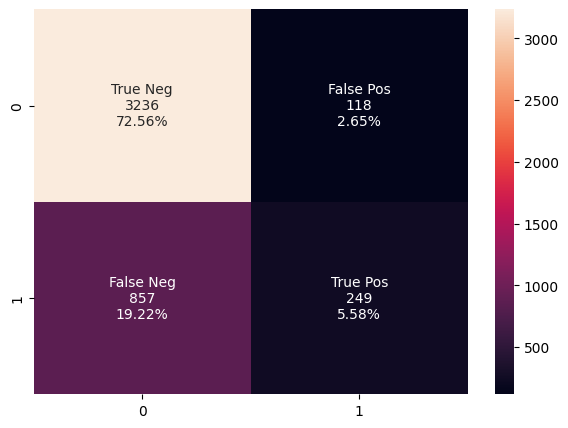

In [43]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix_gb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix_gb.flatten()/np.sum(cnf_matrix_gb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix_gb, annot=labels, fmt='')

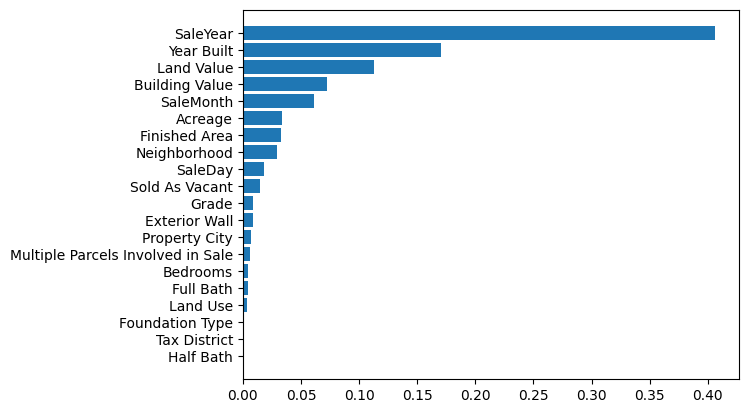

In [44]:
#Feature Importance
importances = gb_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])